In [1]:
%matplotlib inline
#!export PROJ_LIB=/home/manmeet/anaconda3/envs/FERRET/share/proj/
import os
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

#from mpl_toolkits.basemap import Basemap

import netCDF4 as nc

from six.moves import urllib # six is for Python 2/3 compatibility


#import seaborn as sns
# https://currents.soest.hawaii.edu/ocn_data_analysis/installation.html

In [2]:
ens1 = nc.Dataset('sst_ocean_1968_1970_anom_nino3_fldmean.nc')
ens1_2x = nc.Dataset('sst_ocean_1968_1970_monmean_2x_volc_anom_nino3_fldmean.nc')
ens1_4x = nc.Dataset('sst_ocean_1968_1970_monmean_4x_volc_anom_nino3_fldmean.nc')

ens2 = nc.Dataset('sst_ocean_1979_1981_anom_nino3_fldmean.nc')
ens3 = nc.Dataset('sst_ocean_2051_2053_anom_nino3_fldmean.nc')
ens3_025x = nc.Dataset('sst_ocean_2051_2053_monmean_0.25x_volc_anom_nino3_fldmean.nc')
ens3_050x = nc.Dataset('sst_ocean_2051_2053_monmean_0.5x_volc_anom_nino3_fldmean.nc')


ens4 = nc.Dataset('sst_ocean_2061_2063_anom_nino3_fldmean.nc')
ens5 = nc.Dataset('sst_ocean_2062_2064_anom_nino3_fldmean.nc')
ens6 = nc.Dataset('sst_ocean_2073_2075_anom_nino3_fldmean.nc')
ens7 = nc.Dataset('sst_ocean_2104_2106_anom_nino3_fldmean.nc')
ens8 = nc.Dataset('sst_ocean_2128_2130_anom_nino3_fldmean.nc')
ens8_025x = nc.Dataset('sst_ocean_2128_2130_monmean_0.25x_volc_anom_nino3_fldmean.nc')
ens8_050x = nc.Dataset('sst_ocean_2128_2130_monmean_0.5x_volc_anom_nino3_fldmean.nc')


ens9 = nc.Dataset('sst_ocean_2200_2202_anom_nino3_fldmean.nc')
ens10 = nc.Dataset('sst_ocean_2238_2240_anom_nino3_fldmean.nc')


sst1 = ens1.variables['sst'][0:36,0,0]
sst1_2x = ens1_2x.variables['sst'][0:36,0,0]
sst1_4x = ens1_4x.variables['sst'][0:36,0,0]


sst2 = ens2.variables['sst'][0:36,0,0]
sst3 = ens3.variables['sst'][0:36,0,0]
sst3_025x = ens3_025x.variables['sst'][0:36,0,0]
sst3_050x = ens3_050x.variables['sst'][0:36,0,0]

sst4 = ens4.variables['sst'][0:36,0,0]
sst5 = ens5.variables['sst'][0:36,0,0]
sst6 = ens6.variables['sst'][0:36,0,0]
sst7 = ens7.variables['sst'][0:36,0,0]
sst8 = ens8.variables['sst'][0:36,0,0]
sst8_025x = ens8_025x.variables['sst'][0:36,0,0]
sst8_050x = ens8_050x.variables['sst'][0:36,0,0]

sst9 = ens9.variables['sst'][0:36,0,0]
sst10 = ens10.variables['sst'][0:36,0,0]

ens1.close()
ens1_2x.close()
ens1_4x.close()

ens2.close()
ens3.close()
ens3_025x.close()
ens3_050x.close()


ens4.close()
ens5.close()
ens6.close()
ens7.close()
ens8.close()
ens8_025x.close()
ens8_050x.close()

ens9.close()
ens10.close()

volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)

In [3]:
def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(1, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time
#time = common_time_axis(sst1)
time = np.arange(36)

In [4]:
sst1n = np.ma.filled(sst1.astype(float), np.nan)

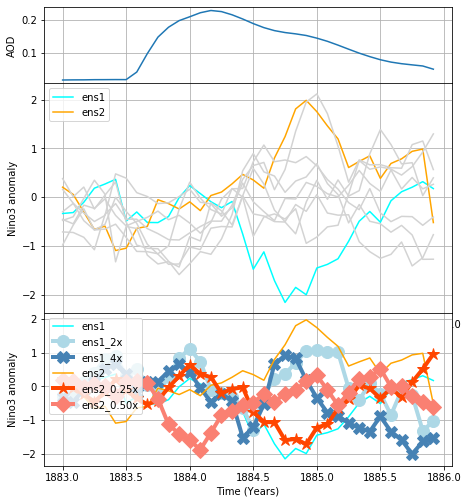

In [5]:
n = 1883
fig = plt.figure(figsize=(7.08,7.08))
ax1 = fig.add_axes([0.1, 0.85, 0.8, 0.15],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.45])
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.3])

dummy = np.zeros(sst1.shape[0])
dummy_mean = np.zeros(sst1.shape[0])
dummy_std = np.zeros(sst1.shape[0])
ax2.grid()
ax2.plot(time/12+n, sst1, label = 'ens1', color = 'cyan') # La Nina state
#ax2.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'red')
#ax2.plot(time/12+n, sst1_4x, label = 'ens1_4x', lw=4, marker='X', markersize=12, color = 'blue')

ax3.plot(time/12+n, sst1, label = 'ens1', color = 'cyan') # La Nina state
ax3.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'lightblue')
ax3.plot(time/12+n, sst1_4x, label = 'ens1_4x', lw=4, marker='X', markersize=12, color = 'steelblue')


#plt.plot(time/12+n, sst2, label = 'ens2')
ax2.plot(time/12+n, sst3, label = 'ens2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3, label = 'ens2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3_025x, label = 'ens2_0.25x', lw=4, marker="*", markersize=12, color = 'orangered')
ax3.plot(time/12+n, sst3_050x, label = 'ens2_0.50x', lw=4, marker="D", markersize=12, color = 'salmon')

ax2.plot(time/12+n, sst4, color='lightgrey')
ax2.plot(time/12+n, sst5, color='lightgrey')
ax2.plot(time/12+n, sst6, color='lightgrey')
ax2.plot(time/12+n, sst7, color='lightgrey')
ax2.plot(time/12+n, sst8, color='lightgrey') # El Nino state
#ax2.plot(time/12+n, sst8_025x, label = 'ens7_0.25x', lw=4, marker="s", markersize=12, color = 'magenta')
#ax2.plot(time/12+n, sst8_050x, label = 'ens7_0.50x', lw=4, marker="P", markersize=12, color = 'yellow')
ax2.plot(time/12+n, sst9, color='lightgrey')
ax2.plot(time/12+n, sst10, color='lightgrey')
for i in range(dummy.shape[0]):
    dummy_mean[i] = np.mean((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    dummy_std[i] = np.std((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    

dummy[:] = dummy_mean + dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
dummy[:]= dummy_mean - dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
ax2.legend(loc='upper left')
#lt.plot(0, dummy,"black")
ax1.plot(time/12+n,volc_aod_10)
ax1.grid()
ax2.set_ylabel("Nino3 anomaly")
ax3.set_ylabel("Nino3 anomaly")
ax1.set_ylabel("AOD")
ax3.set_xlabel("Time (Years)")
ax3.grid()
ax3.legend(loc='upper left')
#ax2.text(1883.5, 2, "Strong La Nina state post volcano : ens1", fontsize=18)
#ax2.text(1883.5, 1.75, "Strong El Nino state post volcano : ens2", fontsize=18)
#ax2.text(1883.5, 1.5, "Strong El Nino state post volcano : ens7", fontsize=18)
#ax2.xlabel('Years')
#ax2.ylabel('Nino3')
#ax2.title('La Nina-like conditions during the volcanic eruption')
plt.savefig('figure_iitmesm_experiments.pdf')

From the analysis above we have found that mostly in all cases when we start from a neutral to La Nina like state, an El Nino occurs except for the first ensemble(ens1), whereas for ens2 and ens7 very strong El Ninos result, We now test the sensitivity of these states for the volcanic eruption. 
ens1 corresponds to the initial condition at timestamp 1968 in the PI control run 
ens2 corresponds to the initial condition at timestamp 2051 in the PI control run 
ens7 corresponds to the initial condition at timestamp 2128 in the PI control run 

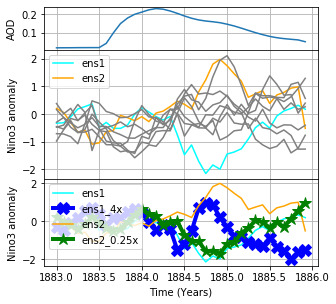

In [6]:
n = 1883
fig = plt.figure(figsize=(4.75,4))
ax1 = fig.add_axes([0.1, 0.85, 0.8, 0.15],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.45], xticklabels=[])
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.3])

dummy = np.zeros(sst1.shape[0])
dummy_mean = np.zeros(sst1.shape[0])
dummy_std = np.zeros(sst1.shape[0])
ax2.grid()
ax2.plot(time/12+n, sst1, label = 'ens1', color = 'cyan') # La Nina state
#ax2.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'red')
#ax2.plot(time/12+n, sst1_4x, label = 'ens1_4x', lw=4, marker='X', markersize=12, color = 'blue')

ax3.plot(time/12+n, sst1, label = 'ens1', color = 'cyan') # La Nina state
#ax3.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'red')
ax3.plot(time/12+n, sst1_4x, label = 'ens1_4x', lw=4, marker='X', markersize=12, color = 'blue')


#plt.plot(time/12+n, sst2, label = 'ens2')
ax2.plot(time/12+n, sst3, label = 'ens2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3, label = 'ens2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3_025x, label = 'ens2_0.25x', lw=4, marker="*", markersize=12, color = 'green')
#ax3.plot(time/12+n, sst3_050x, label = 'ens2_0.50x', lw=4, marker="D", markersize=12, color = 'cyan')

ax2.plot(time/12+n, sst4, color = 'gray')
ax2.plot(time/12+n, sst5, color = 'gray')
ax2.plot(time/12+n, sst6, color = 'gray')
ax2.plot(time/12+n, sst7, color = 'gray')
ax2.plot(time/12+n, sst8, color = 'gray') # El Nino state
#ax2.plot(time/12+n, sst8_025x, label = 'ens7_0.25x', lw=4, marker="s", markersize=12, color = 'magenta')
#ax2.plot(time/12+n, sst8_050x, label = 'ens7_0.50x', lw=4, marker="P", markersize=12, color = 'yellow')
ax2.plot(time/12+n, sst9, color = 'gray')
ax2.plot(time/12+n, sst10, color = 'gray')
for i in range(dummy.shape[0]):
    dummy_mean[i] = np.mean((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    dummy_std[i] = np.std((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    

dummy[:] = dummy_mean + dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
dummy[:]= dummy_mean - dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
ax2.legend(loc='upper left')
#lt.plot(0, dummy,"black")
ax1.plot(time/12+n,volc_aod_10)
ax1.grid()
ax2.set_ylabel("Nino3 anomaly")
ax3.set_ylabel("Nino3 anomaly")
ax1.set_ylabel("AOD")
ax3.set_xlabel("Time (Years)")
ax3.grid()
ax3.legend(loc='upper left')
#ax2.text(1883.5, 2, "Strong La Nina state post volcano : ens1", fontsize=18)
#ax2.text(1883.5, 1.75, "Strong El Nino state post volcano : ens2", fontsize=18)
#ax2.text(1883.5, 1.5, "Strong El Nino state post volcano : ens7", fontsize=18)
#ax2.xlabel('Years')
#ax2.ylabel('Nino3')
#ax2.title('La Nina-like conditions during the volcanic eruption')
plt.savefig('cold_phase.pdf')

In [7]:
ens1 = nc.Dataset('pr_atm_mon_1968_1970_goswami_india_fldmean_anom.nc')

ens1_4x = nc.Dataset('pr_atm_mon_1968_1970_4x_volc_goswami_india_fldmean_anom.nc')


ens3 = nc.Dataset('pr_atm_mon_2051_2053_goswami_india_fldmean_anom.nc')
ens3_025x = nc.Dataset('pr_atm_mon_2051_2053_0.25x_volc_goswami_india_fldmean_anom.nc')



ens4 = nc.Dataset('pr_atm_mon_2061_2063_goswamy_india_fldmean_anom.nc')
ens5 = nc.Dataset('pr_atm_mon_2062_2064_goswami_india_fldmean_anom.nc')
ens6 = nc.Dataset('pr_atm_mon_2073_2075_goswami_india_fldmean_anom.nc')
ens7 = nc.Dataset('pr_atm_mon_2104_2106_goswami_india_fldmean_anom.nc')
ens8 = nc.Dataset('pr_atm_mon_2128_2130_goswamy_india_fldmean_anom.nc')




ens9 = nc.Dataset('pr_atm_mon_2200_2202_goswamy_india_fldmean_anom.nc')
ens10 = nc.Dataset('pr_atm_mon_2238_2240_goswamy_india_fldmean_anom.nc')


sst1 = ens1.variables['pr'][0:35,0,0]*86400

sst1_4x = ens1_4x.variables['pr'][0:35,0,0]*86400



sst3 = ens3.variables['pr'][0:35,0,0]*86400
sst3_025x = ens3_025x.variables['pr'][0:35,0,0]*86400


sst4 = ens4.variables['pr'][0:35,0,0]*86400
sst5 = ens5.variables['pr'][0:35,0,0]*86400
sst6 = ens6.variables['pr'][0:35,0,0]*86400
sst7 = ens7.variables['pr'][0:35,0,0]*86400
sst8 = ens8.variables['pr'][0:35,0,0]*86400



sst9 = ens9.variables['pr'][0:35,0,0]*86400
sst10 = ens10.variables['pr'][0:35,0,0]*86400

ens1.close()

ens1_4x.close()


ens3.close()
ens3_025x.close()



ens4.close()
ens5.close()
ens6.close()
ens7.close()
ens8.close()


ens9.close()
ens10.close()

volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)[0:35]

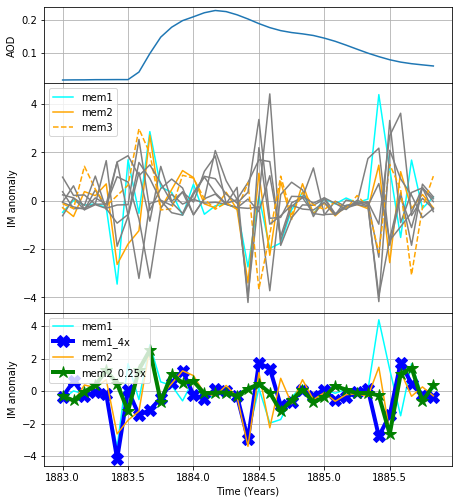

In [11]:
time = np.arange(35)
n = 1883
fig = plt.figure(figsize=(7.08,7.08))
ax1 = fig.add_axes([0.1, 0.85, 0.8, 0.15],
                   xticklabels=[])
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.45], xticklabels=[])
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.3])

dummy = np.zeros(sst1.shape[0])
dummy_mean = np.zeros(sst1.shape[0])
dummy_std = np.zeros(sst1.shape[0])
ax2.grid()
ax2.plot(time/12+n, sst1, label = 'mem1', color = 'cyan') # La Nina state
#ax2.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'red')
#ax2.plot(time/12+n, sst1_4x, label = 'ens1_4x', lw=4, marker='X', markersize=12, color = 'blue')

ax3.plot(time/12+n, sst1, label = 'mem1', color = 'cyan') # La Nina state
#ax3.plot(time/12+n, sst1_2x, label = 'ens1_2x', lw=4, marker='o', markersize=12, color = 'red')
ax3.plot(time/12+n, sst1_4x, label = 'mem1_4x', lw=4, marker='X', markersize=12, color = 'blue')


#plt.plot(time/12+n, sst2, label = 'ens2')
ax2.plot(time/12+n, sst3, label = 'mem2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3, label = 'mem2', color = 'orange') # El Nino state
ax3.plot(time/12+n, sst3_025x, label = 'mem2_0.25x', lw=4, marker="*", markersize=12, color = 'green')
#ax3.plot(time/12+n, sst3_050x, label = 'ens2_0.50x', lw=4, marker="D", markersize=12, color = 'cyan')

ax2.plot(time/12+n, sst4, color = 'gray')
ax2.plot(time/12+n, sst5, color = 'gray')
ax2.plot(time/12+n, sst6, color = 'gray')
ax2.plot(time/12+n, sst7, color = 'gray')
ax2.plot(time/12+n, sst8, '--', color = 'orange', label='mem3') # El Nino state
#ax2.plot(time/12+n, sst8_025x, label = 'ens7_0.25x', lw=4, marker="s", markersize=12, color = 'magenta')
#ax2.plot(time/12+n, sst8_050x, label = 'ens7_0.50x', lw=4, marker="P", markersize=12, color = 'yellow')
ax2.plot(time/12+n, sst9, color = 'gray')
ax2.plot(time/12+n, sst10, color = 'gray')
for i in range(dummy.shape[0]):
    dummy_mean[i] = np.mean((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    dummy_std[i] = np.std((sst1[i],sst3[i], sst4[i], sst5[i], sst6[i], sst7[i], sst8[i], sst9[i], sst10[i]))
    

dummy[:] = dummy_mean + dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
dummy[:]= dummy_mean - dummy_std
#ax2.plot(time/12+n, dummy,"k--")
#ax3.plot(time/12+n, dummy,"k--")
ax2.legend(loc='upper left')
#lt.plot(0, dummy,"black")
ax1.plot(time/12+n,volc_aod_10)
ax1.grid()
ax2.set_ylabel("IM anomaly")
ax3.set_ylabel("IM anomaly")
ax1.set_ylabel("AOD")
ax3.set_xlabel("Time (Years)")
ax3.grid()
ax3.legend(loc='upper left')
#ax2.text(1883.5, 2, "Strong La Nina state post volcano : ens1", fontsize=18)
#ax2.text(1883.5, 1.75, "Strong El Nino state post volcano : ens2", fontsize=18)
#ax2.text(1883.5, 1.5, "Strong El Nino state post volcano : ens7", fontsize=18)
#ax2.xlabel('Years')
#ax2.ylabel('Nino3')
#ax2.title('La Nina-like conditions during the volcanic eruption')
plt.savefig('cold_phase.pdf')